In [3]:
import numpy as np
from scipy.linalg import eig
from scipy.linalg import block_diag
import matplotlib.pyplot as plt

In [4]:
def modularity(A,γ=1):
    '''
    Implementation of Newman's Spectral Clustering Algorithm for Undirected Graphs
    A: NxN Matrix
    γ: Module size preference ( γ=1 : classical;
                                0<=γ<1 : prefer larger modules;
                                γ>1 : prefer smaller modules)
    '''
    N = A.shape[0]
    K = np.sum(A,axis=0)
    m = np.sum(K)
    B = A-γ*(np.matmul(K.reshape(-1,1),K.reshape(1,-1)))/m
    Ci=np.ones((N,1))
    cn=1
    U=[1,0]
    ind=np.arange(N)
    Bg=B
    Ng=N
    while U[0]:
        D,V = eig(Bg) # Right Eigenvalue decomposition
        i1 = np.argmax(np.real(D)) # Max real eigenvalue
        v1=V[:,i1]
        S=np.ones((Ng,1))
        S[v1<0]=-1 # flip for negative eigenvector elements 
        q=np.matmul(np.matmul(S.T,Bg),S); # modularity measure
        if q>1e-10: # tolerance
            qmax = q;
            Bg[np.eye(Ng)==1] = 0
            indg = np.ones((Ng,1))
            Sit = S
            while np.any(~np.isnan(indg)):
                Qit = qmax - 4*Sit*np.matmul(Bg,Sit) 
                qmax = np.nanmax(Qit*indg)
                imax = np.nanargmax(Qit*indg)
                Sit[imax]=-Sit[imax]
                indg[imax]=np.NaN;             
                if qmax>q:              
                    q=qmax                
                    S=Sit
            if np.abs(np.sum(S))==Ng:
                U[0]=0
            else:
                cn=cn+1
                Ci[ind[S.flatten()==1]]=U[0]
                Ci[ind[S.flatten()==1]]=cn
                U = [cn,U]
        else:
            U[0] = 0
        ind = np.arange(N)[Ci.flatten()==U[0]]
        bg = B[ind,:][:,ind]
        Bg = bg-np.diag(np.sum(bg,axis=0))
        Ng = ind.shape[0]
    s = Ci[:,[0]*N]
    Q =((s-s.T)==0)*B/m
    Q = np.sum(Q)
    return Ci,Q

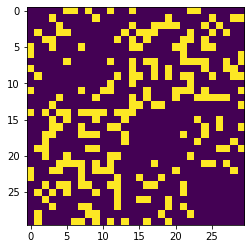

In [5]:
np.random.seed(9034893)
n = 30
target_p = 0.2
p = np.min(np.roots([-1,2,-target_p]))
A = np.random.choice([0,1],p=[1-p,p],size=(n,n))
A = np.int32((A+A.T)>0)
Ci,Q = modularity(1-A,1)
order = np.argsort(Ci.flatten())
np.save('matrix_1',A)
np.save('matrix_1_modules',Ci.flatten())
plt.imshow(A[order,:][:,order])

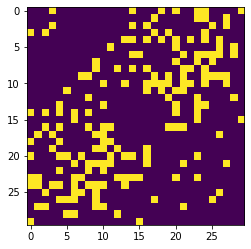

In [6]:
np.random.seed(9034892)
n = 30
target_p = 0.2
p = np.min(np.roots([-1,2,-target_p]))
A = np.random.choice([0,1],p=[1-p,p],size=(n,n))
A = np.int32((A+A.T)>0)
Ci,Q = modularity(1-A,1)
order = np.argsort(Ci.flatten())
np.save('matrix_2',A)
np.save('matrix_2_modules',Ci.flatten())
plt.imshow(A[order,:][:,order])

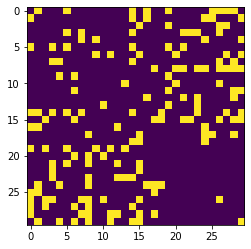

In [7]:
np.random.seed(9034891)
n = 30
target_p = 0.2
p = np.min(np.roots([-1,2,-target_p]))
A = np.random.choice([0,1],p=[1-p,p],size=(n,n))
A = np.int32((A+A.T)>0)
Ci,Q = modularity(1-A,1)
order = np.argsort(Ci.flatten())
np.save('matrix_3',A)
np.save('matrix_3_modules',Ci.flatten())
plt.imshow(A[order,:][:,order])

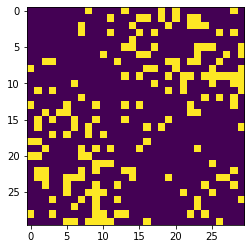

In [8]:
np.random.seed(9034890)
n = 30
target_p = 0.2
p = np.min(np.roots([-1,2,-target_p]))
A = np.random.choice([0,1],p=[1-p,p],size=(n,n))
A = np.int32((A+A.T)>0)
Ci,Q = modularity(1-A,1)
order = np.argsort(Ci.flatten())
np.save('matrix_4',A)
np.save('matrix_4_modules',Ci.flatten())
plt.imshow(A[order,:][:,order])

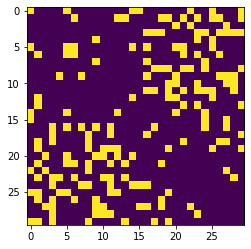

In [9]:
np.random.seed(9034889)
n = 30
target_p = 0.2
p = np.min(np.roots([-1,2,-target_p]))
A = np.random.choice([0,1],p=[1-p,p],size=(n,n))
A = np.int32((A+A.T)>0)
Ci,Q = modularity(1-A,1)
order = np.argsort(Ci.flatten())
np.save('matrix_5',A)
np.save('matrix_5_modules',Ci.flatten())
plt.imshow(A[order,:][:,order])

In [10]:
# A = block_diag(np.ones((10,10)),np.ones((5,5)),np.ones((5,5)),np.ones((10,10)))
# randomorder = np.random.choice(np.arange(30),replace=False,size=30)
# A = A[randomorder,:][:,randomorder]
# order = np.argsort(Ci.flatten())
# plt.imshow(A[order,:][:,order])

In [11]:
values = []
for n in range(500):
    A = np.random.choice([0,1],p=[0.5,0.5],size=(100,100))
    A = np.int32((A+A.T)>0)
    Ci,Q = modularity(1-A,1)
    within = np.mean(np.concatenate([A[Ci.flatten()==i,:][:,Ci.flatten()==i].flatten() for i in np.unique(Ci)]) )
    across = np.mean(np.concatenate([A[Ci.flatten()==i,:][:,Ci.flatten()!=i].flatten() for i in np.unique(Ci)]) )
    values.append([within,across,across/within])
values=np.array(values)

In [12]:
import seaborn as sns

<AxesSubplot:>

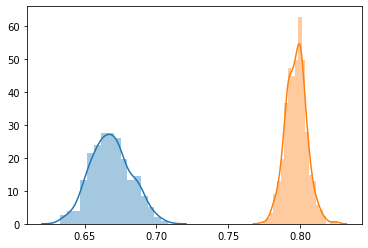

In [13]:
sns.distplot(values[:,0])
sns.distplot(values[:,1])

<AxesSubplot:>

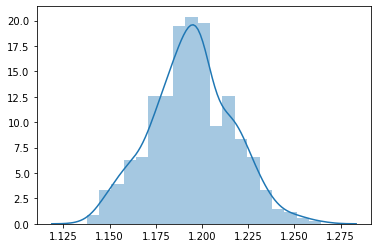

In [9]:
sns.distplot(values[:,2])

In [37]:
D,V = eig(A)

In [46]:
v1=V[:,np.argmax(np.real(D))]

In [48]:
v1

array([0.29336151+0.j, 0.25483356+0.j, 0.29006737+0.j, 0.26122265+0.j,
       0.37280406+0.j, 0.47134525+0.j, 0.34053021+0.j, 0.21041951+0.j,
       0.34553785+0.j, 0.23630428+0.j])

In [31]:
dist = [np.mean((np.random.choice([0,1],p=[0.9,0.1],size=(30,90))*np.random.choice([0,1],p=[0.9,0.1],size=90)).sum(axis=1)>0) for i in range(1000)]

In [32]:
np.mean(dist),np.std(dist)

(0.5929333333333333, 0.1493208923389118)